# Introduction

Build a neural network of my own design to evaluate the MNIST dataset.

Some of the benchmark results on MNIST include can be found [on Yann LeCun's page](https://webcache.googleusercontent.com/search?q=cache:stAVPik6onEJ:yann.lecun.com/exdb/mnist) and include:

88% [Lecun et al., 1998](https://hal.science/hal-03926082/document)

95.3% [Lecun et al., 1998](https://hal.science/hal-03926082v1/document)

99.65% [Ciresan et al., 2011](http://people.idsia.ch/~juergen/ijcai2011.pdf)


MNIST is a great dataset for sanity checking your models, since the accuracy levels achieved by large convolutional neural networks and small linear models are both quite high. This makes it important to be familiar with the data.

## Installation

In [1]:
# Update the PATH to include the user installation directory. 
import os
os.environ['PATH'] = f"{os.environ['PATH']}:/root/.local/bin"

# Restart the Kernel before you move on to the next step.

#### Important: Restart the Kernel before you move on to the next step.

In [1]:
# Install requirements
!python -m pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 37.1 MB 3.1 MB/s eta 0:00:01
     |████████████████████████████████| 19.3 MB 61.1 MB/s eta 0:00:01     |███████████████████▏            | 11.6 MB 61.1 MB/s eta 0:00:01
     |████████████████████████████████| 21.0 MB 54.3 MB/s eta 0:00:01
     |████████████████████████████████| 76 kB 7.3 MB/s  eta 0:00:01
     |████████████████████████████████| 123 kB 33.9 MB/s eta 0:00:01
     |████████████████████████████████| 297 kB 71.4 MB/s eta 0:00:01
     |████████████████████████████████| 11.3 MB 68.4 MB/s eta 0:00:01
     |████████████████████████████████| 292 kB 71.8 MB/s eta 0:00:01
     |████████████████████████████████| 109 kB 66.4 MB/s eta 0:00:01
     |████████████████████████████████| 1.6 MB 60.6 MB/s eta 0:00:01
     |████████████████████████████████| 214 kB 59.6 MB/s eta 0:00:01
     |████████████████████████████████| 98 kB 10.8 MB/s eta 0:00:01
     |██████████████████

     |████████████████████████████████| 93 kB 2.7 MB/s  eta 0:00:01
  Created wheel for bokeh: filename=bokeh-2.1.1-py3-none-any.whl size=9257186 sha256=452f3588ec0d80d638c545ed005d637554c95ebeeeb5d71d711ff28fa5e8d4c6
  Stored in directory: /root/.cache/pip/wheels/f7/55/ff/f3d7554e69382d31cf7ad857cf518af9b923134fca7d925187
Successfully built bokeh
ERROR: jupyter-console 6.6.3 has requirement ipykernel>=6.14, but you'll have ipykernel 4.10.0 which is incompatible.
ERROR: jupyter-console 6.6.3 has requirement jupyter-client>=7.0.0, but you'll have jupyter-client 6.0.0 which is incompatible.
ERROR: jupyter-console 6.6.3 has requirement jupyter-core!=5.0.*,>=4.12, but you'll have jupyter-core 4.6.3 which is incompatible.
ERROR: jupyter-console 6.6.3 has requirement prompt-toolkit>=3.0.30, but you'll have prompt-toolkit 3.0.3 which is incompatible.
ERROR: jupyter-console 6.6.3 has requirement traitlets>=5.4, but you'll have traitlets 4.3.3 which is incompatible.
  Consider adding this direc

## Imports

In [1]:
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
from torchvision import datasets
import matplotlib.pyplot as plt
import numpy as np
import random

In [2]:
help(DataLoader)

Help on class DataLoader in module torch.utils.data.dataloader:

class DataLoader(typing.Generic)
 |  DataLoader(*args, **kwds)
 |  
 |  Data loader. Combines a dataset and a sampler, and provides an iterable over
 |  the given dataset.
 |  
 |  The :class:`~torch.utils.data.DataLoader` supports both map-style and
 |  iterable-style datasets with single- or multi-process loading, customizing
 |  loading order and optional automatic batching (collation) and memory pinning.
 |  
 |  See :py:mod:`torch.utils.data` documentation page for more details.
 |  
 |  Args:
 |      dataset (Dataset): dataset from which to load the data.
 |      batch_size (int, optional): how many samples per batch to load
 |          (default: ``1``).
 |      shuffle (bool, optional): set to ``True`` to have the data reshuffled
 |          at every epoch (default: ``False``).
 |      sampler (Sampler or Iterable, optional): defines the strategy to draw
 |          samples from the dataset. Can be any ``Iterable``

In [3]:
DataLoader.__dict__

mappingproxy({'__module__': 'torch.utils.data.dataloader',
              '__annotations__': {'dataset': torch.utils.data.dataset.Dataset[+T_co],
               'batch_size': typing.Union[int, NoneType],
               'num_workers': int,
               'pin_memory': bool,
               'drop_last': bool,
               'timeout': float,
               'sampler': typing.Union[torch.utils.data.sampler.Sampler, typing.Iterable],
               'prefetch_factor': int,
               '_iterator': typing.Union[ForwardRef('_BaseDataLoaderIter'), NoneType]},
              '__doc__': '\n    Data loader. Combines a dataset and a sampler, and provides an iterable over\n    the given dataset.\n\n    The :class:`~torch.utils.data.DataLoader` supports both map-style and\n    iterable-style datasets with single- or multi-process loading, customizing\n    loading order and optional automatic batching (collation) and memory pinning.\n\n    See :py:mod:`torch.utils.data` documentation page for more det

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [36]:
#seeds for reproducibility
seed = 3
torch.manual_seed(seed)
np.random.seed(seed)
random.seed(seed)
if torch.cuda.is_available():
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

## Load the Dataset

Specify your transforms as a list if you intend to .
The transforms module is already loaded as `transforms`.

MNIST is fortunately included in the torchvision module.
Then, you can create your dataset using the `MNIST` object from `torchvision.datasets` ([the documentation is available here](https://pytorch.org/vision/stable/datasets.html#mnist)).
Make sure to specify `download=True`! 

Once your dataset is created, you'll also need to define a `DataLoader` from the `torch.utils.data` module for both the train and the test set.

In [30]:
# Define transforms
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Create training set and define training dataloader
training_data = datasets.MNIST(root="MNIST", train=True, download=True, transform=transform)
train_loader = DataLoader(training_data, batch_size=100, shuffle=True)

# Create test set and define test dataloader
test_data = datasets.MNIST(root="MNIST", train=False, download=True, transform=transform)
test_loader = DataLoader(test_data, batch_size=100)

In [ ]:
# Define split sizes (e.g., 90% train, 10% validation)
train_size = int(0.9 * len(training_data))
val_size = len(training_data) - train_size

# Split the dataset
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

## Justify your preprocessing

In your own words, why did you choose the transforms you chose? If you didn't use any preprocessing steps, why not?

* Transform image data (MNIST) to tensors as pytorch models cant work with image or ndarray if it is not converted to a tensor format. Scaled pixel values to [0, 1]
* Normalise to help the model train more efficiently by standardizing the input values - used these paremeters (0.5,), (0.5,) as the images are grayscale so brightness (intensity of values) is used rather than color


## Explore the Dataset
Using matplotlib, numpy, and torch, explore the dimensions of your data.

You can view images using the `show5` function defined below – it takes a data loader as an argument.
Remember that normalized images will look really weird to you! You may want to try changing your transforms to view images.
Typically using no transforms other than `toTensor()` works well for viewing – but not as well for training your network.
If `show5` doesn't work, go back and check your code for creating your data loaders and your training/test sets.

In [9]:
## This cell contains a function for showing 5 images from a dataloader
def show5(img_loader):
    dataiter = iter(img_loader)
    
    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(int(labels[i].detach()))
    
        image = images[i].numpy()
        plt.imshow(image.T.squeeze().T)
        plt.show()

7


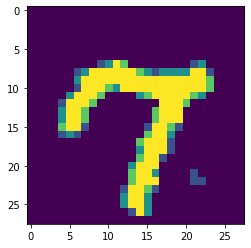

5


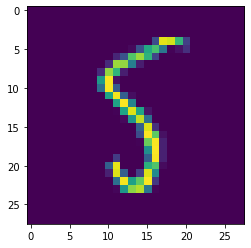

8


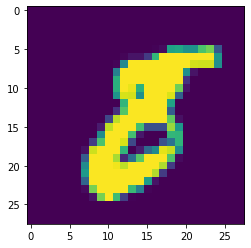

0


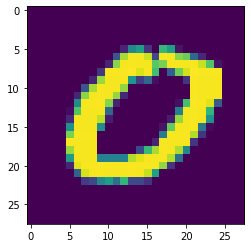

0


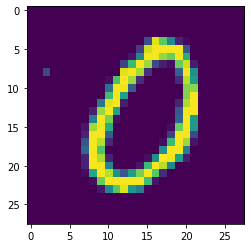

In [4]:
# Explore data
show5(train_loader)

## Build your Neural Network
Using the layers in `torch.nn` (which has been imported as `nn`) and the `torch.nn.functional` module (imported as `F`), construct a neural network based on the parameters of the dataset.
Use any architecture you like. 

*Note*: If you did not flatten your tensors in your transforms or as part of your preprocessing and you are using only `Linear` layers, make sure to use the `Flatten` layer in your network!

In [31]:
# Define the class for your neural network
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.activation = F.relu
        self.fc1 = nn.Linear(28 * 28 * 1, 120)
        self.fc2 = nn.Linear(120, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = self.activation(self.fc1(x))
        x = self.activation(self.fc2(x))
        x = self.fc3(x)
        return x

# Instantiate the model
net = Net()
net = Net().to(device)

Specify a loss function and an optimizer, and instantiate the model.

If you use a less common loss function, please note why you chose that loss function in a comment.

In [32]:
# Choose an optimizer
optimizer = torch.optim.SGD(net.parameters(), lr=0.01)

# Choose a loss function
# used CrossEntropyLoss as it is good one for multi class classification tasks
# we wont need to apply Softmax as it is already incorporated to this loss function
criterion = nn.CrossEntropyLoss()

## Running your Neural Network
Use whatever method you like to train your neural network, and ensure you record the average loss at each epoch. 
Don't forget to use `torch.device()` and the `.to()` method for both your model and your data if you are using GPU!

If you want to print your loss **during** each epoch, you can use the `enumerate` function and print the loss after a set number of batches. 250 batches works well for most people!

In [33]:
num_epochs = 10

# Establish a list for our history
train_loss_history = list()
val_loss_history = list()

for epoch in range(num_epochs):
    net.train()
    train_loss = 0.0
    train_correct = 0
    for i, data in enumerate(train_loader):
        # data is a list of [inputs, labels]
        inputs, labels = data

        # Pass to GPU if available.
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        _, preds = torch.max(outputs.data, 1)
        train_correct += (preds == labels).sum().item()
        train_loss += loss.item()
    print(f'Epoch {epoch + 1} training accuracy: {train_correct/len(train_loader):.2f}% training loss: {train_loss/len(train_loader):.5f}')
    train_loss_history.append(train_loss/len(train_loader))

Epoch 1 training accuracy: 66.28% training loss: 1.35907
Epoch 2 training accuracy: 86.48% training loss: 0.47847
Epoch 3 training accuracy: 89.31% training loss: 0.37087
Epoch 4 training accuracy: 90.34% training loss: 0.33207
Epoch 5 training accuracy: 90.92% training loss: 0.30932
Epoch 6 training accuracy: 91.45% training loss: 0.29178
Epoch 7 training accuracy: 91.86% training loss: 0.27734
Epoch 8 training accuracy: 92.35% training loss: 0.26414
Epoch 9 training accuracy: 92.63% training loss: 0.25143
Epoch 10 training accuracy: 93.02% training loss: 0.23913


Plot the training loss (and validation loss/accuracy, if recorded).

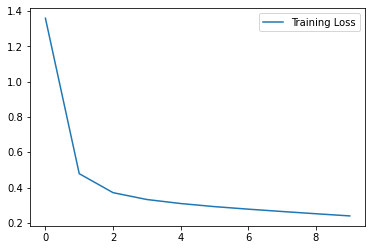

In [36]:
# Plot the training loss history
plt.plot(train_loss_history, label="Training Loss")
plt.legend()
plt.show()

## Testing your model
Using the previously created `DataLoader` for the test set, compute the percentage of correct predictions using the highest probability prediction. 

If your accuracy is over 90%, great work, but see if you can push a bit further! 
If your accuracy is under 90%, you'll need to make improvements.
Go back and check your model architecture, loss function, and optimizer to make sure they're appropriate for an image classification task.

In [37]:
test_loss = 0.0
test_correct = 0
net.eval()  # Set the model to evaluation mode for testing

# No need for gradient calculations during testing
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        # Forward pass
        outputs = net(inputs)
        
        # Calculate the test loss
        loss = criterion(outputs, labels)
        test_loss += loss.item()

        # Get the predicted class with highest score
        _, preds = torch.max(outputs.data, 1)
        
        # Calculate test accuracy
        test_correct += (preds == labels).sum().item()

# Calculate final test loss and accuracy
test_accuracy = 100 * test_correct / len(test_loader.dataset)
test_loss = test_loss / len(test_loader)

# Print final test results
print(f'\nTest accuracy: {test_accuracy:.2f}%')
print(f'Test loss: {test_loss:.5f}')


Test accuracy: 93.33%
Test loss: 0.22860


## Improving your model

Once your model is done training, try tweaking your hyperparameters and training again below to improve your accuracy on the test set!

In [38]:
# Choose an optimizer
# Added momentum to solve the local minimum problem if there is any and weight_decay
optimizer = torch.optim.SGD(net.parameters(), lr=0.01, weight_decay=0.001, momentum=0.5)

In [39]:
num_epochs = 10

# Establish a list for our history
train_loss_history = list()
val_loss_history = list()

for epoch in range(num_epochs):
    net.train()
    train_loss = 0.0
    train_correct = 0
    for i, data in enumerate(train_loader):
        # data is a list of [inputs, labels]
        inputs, labels = data

        # Pass to GPU if available.
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        _, preds = torch.max(outputs.data, 1)
        train_correct += (preds == labels).sum().item()
        train_loss += loss.item()
    print(f'Epoch {epoch + 1} training accuracy: {train_correct/len(train_loader):.2f}% training loss: {train_loss/len(train_loader):.5f}')
    train_loss_history.append(train_loss/len(train_loader))

Epoch 1 training accuracy: 93.36% training loss: 0.22834
Epoch 2 training accuracy: 94.01% training loss: 0.20727
Epoch 3 training accuracy: 94.47% training loss: 0.18945
Epoch 4 training accuracy: 94.94% training loss: 0.17392
Epoch 5 training accuracy: 95.40% training loss: 0.15976
Epoch 6 training accuracy: 95.75% training loss: 0.14868
Epoch 7 training accuracy: 95.98% training loss: 0.13844
Epoch 8 training accuracy: 96.32% training loss: 0.12935
Epoch 9 training accuracy: 96.50% training loss: 0.12140
Epoch 10 training accuracy: 96.73% training loss: 0.11420


In [41]:
test_loss = 0.0
test_correct = 0
net.eval()  # Set the model to evaluation mode for testing

# No need for gradient calculations during testing
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        # Forward pass
        outputs = net(inputs)
        
        # Calculate the test loss
        loss = criterion(outputs, labels)
        test_loss += loss.item()

        # Get the predicted class with highest score
        _, preds = torch.max(outputs.data, 1)
        
        # Calculate test accuracy
        test_correct += (preds == labels).sum().item()

# Calculate final test loss and accuracy
test_accuracy = 100 * test_correct / len(test_loader.dataset)
test_loss = test_loss / len(test_loader)

# Print final test results
print(f'\nTest accuracy: {test_accuracy:.2f}%')
print(f'Test loss: {test_loss:.5f}')


Test accuracy: 96.26%
Test loss: 0.12652


In [42]:
# Define the class for your neural network
# Added dropout layer for regularisation to improve accuracy but also remove overfitting if there is any
# Added another hidden layer as well fc4
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.activation = F.relu
        self.fc1 = nn.Linear(28 * 28 * 1, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.dropout = nn.Dropout(0.5) #dropout layer
        self.fc4 = nn.Linear(64, 10)

    def forward(self, x):
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = self.activation(self.fc1(x))
        x = self.dropout(x)  # Apply dropout
        x = self.activation(self.fc2(x))
        x = self.dropout(x)  # Apply dropout
        x = self.activation(self.fc3(x))
        x = self.fc4(x)
        return x

# Instantiate the model
net = Net()
net = Net().to(device)

In [43]:
# Choose an optimizer
optimizer = torch.optim.SGD(net.parameters(), lr=0.01, weight_decay=0.001, momentum=0.5)

In [44]:
num_epochs = 10

# Establish a list for our history
train_loss_history = list()
val_loss_history = list()

for epoch in range(num_epochs):
    net.train()
    train_loss = 0.0
    train_correct = 0
    for i, data in enumerate(train_loader):
        # data is a list of [inputs, labels]
        inputs, labels = data

        # Pass to GPU if available.
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        _, preds = torch.max(outputs.data, 1)
        train_correct += (preds == labels).sum().item()
        train_loss += loss.item()
    print(f'Epoch {epoch + 1} training accuracy: {train_correct/len(train_loader):.2f}% training loss: {train_loss/len(train_loader):.5f}')
    train_loss_history.append(train_loss/len(train_loader))

Epoch 1 training accuracy: 39.30% training loss: 1.75000
Epoch 2 training accuracy: 77.51% training loss: 0.70508
Epoch 3 training accuracy: 85.19% training loss: 0.49637
Epoch 4 training accuracy: 87.82% training loss: 0.41167
Epoch 5 training accuracy: 89.52% training loss: 0.35776
Epoch 6 training accuracy: 90.66% training loss: 0.32280
Epoch 7 training accuracy: 91.52% training loss: 0.29361
Epoch 8 training accuracy: 92.24% training loss: 0.27238
Epoch 9 training accuracy: 92.72% training loss: 0.25322
Epoch 10 training accuracy: 93.14% training loss: 0.24047


In [45]:
test_loss = 0.0
test_correct = 0
net.eval()  # Set the model to evaluation mode for testing

# No need for gradient calculations during testing
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        # Forward pass
        outputs = net(inputs)
        
        # Calculate the test loss
        loss = criterion(outputs, labels)
        test_loss += loss.item()

        # Get the predicted class with highest score
        _, preds = torch.max(outputs.data, 1)
        
        # Calculate test accuracy
        test_correct += (preds == labels).sum().item()

# Calculate final test loss and accuracy
test_accuracy = 100 * test_correct / len(test_loader.dataset)
test_loss = test_loss / len(test_loader)

# Print final test results
print(f'\nTest accuracy: {test_accuracy:.2f}%')
print(f'Test loss: {test_loss:.5f}')


Test accuracy: 95.53%
Test loss: 0.14599


In [ ]:
# accuracy dropped, probably overfitting is removed so might not be still bad idea to keep dropout

In [46]:
print(preds)

tensor([8, 9, 0, 1, 0, 7, 4, 5, 6, 7, 8, 0, 1, 2, 3, 4, 7, 8, 9, 7, 8, 6, 4, 1,
        9, 3, 8, 4, 4, 7, 0, 1, 9, 2, 8, 7, 8, 2, 6, 0, 6, 5, 3, 3, 9, 9, 1, 4,
        0, 6, 1, 0, 0, 6, 2, 1, 1, 7, 7, 8, 4, 6, 0, 7, 0, 3, 6, 8, 7, 1, 3, 2,
        4, 9, 4, 3, 6, 4, 1, 7, 2, 6, 6, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2,
        3, 4, 5, 6], device='cuda:0')


## Saving your model
Using `torch.save`, save your model for future loading.

In [47]:
torch.save(net, 'digits_recognition_gg.pt')